In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd

# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# Monte Carlo 시뮬레이션 간단 예제 (적분)

100%|██████████| 5000000/5000000 [00:29<00:00, 166913.10it/s]


π 값 3.1423632


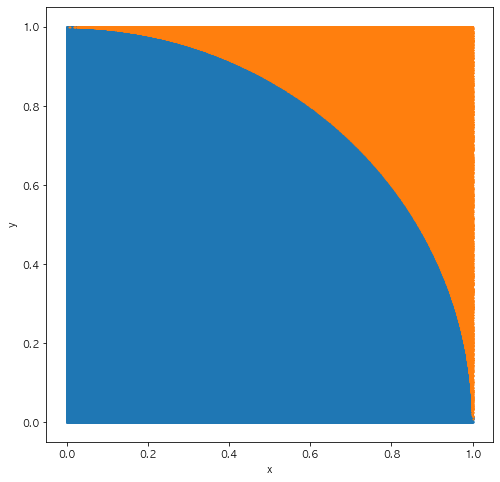

In [3]:
from tqdm import tqdm
import pandas as pd
import numpy as np

# 변수 설정
n = 5000000
count = 0
x_list_under = []
y_list_under = []
x_list_upper = []
y_list_upper = []

for i in tqdm(range(n)):
    # 시드 부여 (난수)
    np.random.seed(i)
    # 0,1 사이의 난수 값 생성
    x = np.random.random()
    y = np.random.random()
    # 원 내부에 있는 점을 만족하는 경우, 그렇지 않은 경우 분리
    if (x**2 + y**2) <= 1: 
        count += 1
        x_list_under.append(x)
        y_list_under.append(y)
    else:
        x_list_upper.append(x)
        y_list_upper.append(y)
    
# 원 내부일 확률은 원 넓이의 1/4 이므로 곱하기 4로 π 계산
print('\u03C0 값', 4*count/n)

under = pd.DataFrame(zip(x_list_under,y_list_under), columns=['x_under', 'y_under'])
upper = pd.DataFrame(zip(x_list_upper,y_list_upper), columns=['x_upper', 'y_upper'])

plt.figure(figsize=(8,8))
plt.scatter(under['x_under'], under['y_under'], s=1)
plt.scatter(upper['x_upper'], upper['y_upper'], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Monte Carlo 시뮬레이션을 통해 BLUE의 특성 증명

## 1. Simple 예시를 통한 회귀계수 도출

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 시드 부여
np.random.seed(2022)

# 임의의 모수 값 지정
N = 100
beta_0 = 10
beta_1 = 0.5

# 샘플 데이터 형성
x = np.arange(start = 0, stop = N + 1, step = 1)
resid = np.random.normal(loc = 0, scale = 7, size = len(x))
y_hat = beta_0 + beta_1 * x + resid
y = beta_0 + beta_1 * x

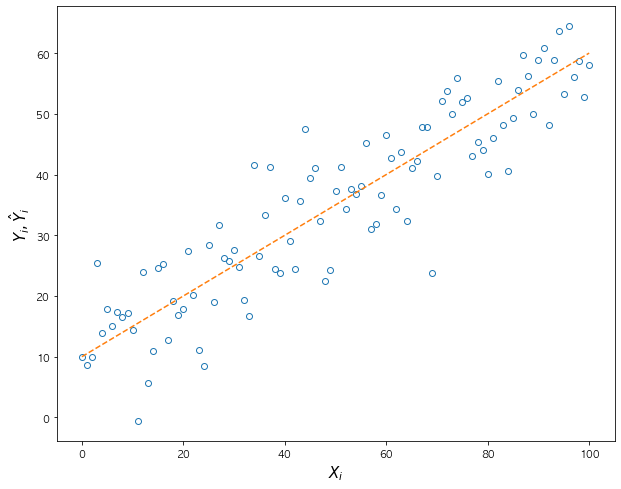

In [5]:
# 시각화
plt.figure(figsize = (10, 8))
plt.plot(x, y_hat, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.plot(x, y, linestyle = "dashed")
plt.xlabel(r'$X_{i}$', size=15)
plt.ylabel(r'$Y_{i}, \hat Y_{i}$', size=15)
plt.show()

In [6]:
import statsmodels.api as sm

# 회귀 분석 시행
model = sm.OLS(y_hat, sm.add_constant(x)).fit()
print(model.summary())
print(f'상수항(beta_0)의 추정 값 : {model.params[0]}')
print(f'회귀계수(beta_1)의 추정 값 : {model.params[1]}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     445.0
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           2.07e-38
Time:                        13:02:14   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8020      1.324      8.161      0.0

## 2. Simple 예시의 반복 시행

In [7]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

# 회귀계수 추정값 리스트 생성
beta_0_list = []
beta_1_list = []

# 몬테카를로 시뮬레이션 시행횟수 지정
simulation = 100000

# 임의의 모수 값 지정
beta_0 = 10
beta_1 = 0.5

# sample 데이터 개수 설정
N = 25

for i in tqdm(range(simulation)):
    # 시드 부여
    np.random.seed(i)

    # 샘플 데이터 형성
    x = np.arange(start = 0, stop = N + 1, step = 1)
    resid = np.random.normal(loc = 0, scale = 7, size = len(x))
    y_hat = beta_0 + beta_1 * x + resid
    
    # 회귀 분석 시행
    model = sm.OLS(y_hat, sm.add_constant(x)).fit()
    
    # 회귀계수 추정치 리스트에 추가
    beta_0_list.append(model.params[0])
    beta_1_list.append(model.params[1])
    
print(f'상수항(beta_0)의 추정 값 : {np.mean(beta_0_list)}')
print(f'회귀계수(beta_1)의 추정 값 : {np.mean(beta_1_list)}')

100%|██████████| 100000/100000 [01:12<00:00, 1374.00it/s]

상수항(beta_0)의 추정 값 : 9.989879731745281
회귀계수(beta_1)의 추정 값 : 0.5002362491438527


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


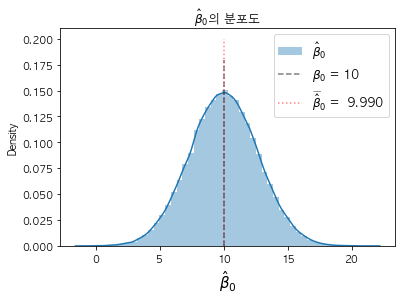

In [8]:
# beta_0 시각화

sns.distplot(beta_0_list, label='$\hat\u03B2_0$')
plt.vlines(x=beta_0, ymin=0, ymax=0.18, alpha = .5, colors='k', linestyles='dashed', label=f'$\u03B2_0$ = {beta_0}')
plt.vlines(x=np.mean(beta_0_list), ymin=0, ymax=0.20, alpha = .5 ,colors='r', linestyles='dotted', label=f'$\widebar\hat\u03B2_0$ = {np.mean(beta_0_list) : .3f}')
plt.title(r'$\hat \beta_{0}$의 분포도')
plt.xlabel(r'$\hat \beta_{0}$', size = 15)
plt.legend(fontsize = 12)
plt.show()

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


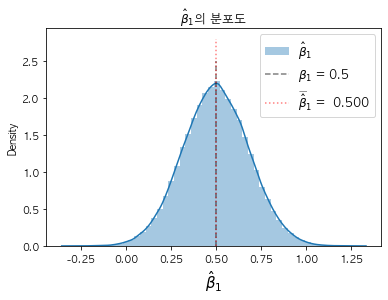

In [9]:
# beta_1 시각화

sns.distplot(beta_1_list, label='$\hat\u03B2_1$')
plt.vlines(x=beta_1, ymin=0, ymax=2.5, alpha = .5, colors='k', linestyles='dashed', label=f'$\u03B2_1$ = {beta_1}')
plt.vlines(x=np.mean(beta_1_list), ymin=0, ymax=2.8, alpha = .5 ,colors='r', linestyles='dotted', label=f'$\widebar\hat\u03B2_1$ = {np.mean(beta_1_list) : .3f}')
plt.title(r'$\hat \beta_{1}$의 분포도')
plt.xlabel(r'$\hat \beta_{1}$', size = 15)
plt.legend(fontsize = 12)
plt.show()

# Monte Carlo 시뮬레이션으로 구한 CAPM

In [3]:
# KRX 정보 가져오는 라이브러리
from pykrx import stock

def ticker_name(market_name):
    name = stock.get_market_ticker_list(market=market_name)
    Market = []
    
    for ticker in tqdm(name):
        Value = stock.get_market_ticker_name(ticker)
        Market.append([Value,ticker])
 
    df = pd.DataFrame(Market,columns=['회사명','상장코드'])
    return df
    
    
KOSPI = ticker_name('KOSPI')
KOSPI

100%|██████████| 940/940 [00:00<00:00, 5416.84it/s]


,회사명,상장코드
0,AJ네트웍스,095570
1,AK홀딩스,006840
2,BGF,027410
3,BGF리테일,282330
4,BNK금융지주,138930
...,...,...
935,휴스틸,005010
936,흥국화재,000540
937,흥국화재2우B,000547
938,흥국화재우,000545


In [4]:
# 시가총액 5대 기업 주식정보가져오기 (2022.05.03 기준 : LG에너지솔루션은 현 시점 기준 시총 2위이지만, 상장한지 4개월 정도이기에 제외)

stocks=['삼성전자','SK하이닉스','삼성바이오로직스', 'NAVER','삼성SDI']
data = pd.DataFrame()

for i in stocks:
    number = KOSPI[KOSPI['회사명']==i]['상장코드']
    data[i] = stock.get_market_ohlcv_by_date(fromdate = "20200503", todate = "20210503", ticker = number)['종가']

data

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI
날짜,,,,,
2020-05-04,48500,81000,549493,199000,277000
2020-05-06,49200,82400,568271,212000,281500
2020-05-07,48800,82400,560364,215500,282500
2020-05-08,48800,85000,581118,214000,285500
2020-05-11,48400,84500,579142,214500,287000
...,...,...,...,...,...
2021-04-27,82900,135000,797555,380000,685000
2021-04-28,82100,130000,781743,373500,667000
2021-04-29,81700,130000,790637,366500,672000


In [5]:
# 로그화를 통해 수익률 도출
daily_return = np.log(data/data.shift(1)).shift(-1).dropna()
daily_return

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI
날짜,,,,,
2020-05-04,0.014330,0.017136,0.033602,0.063281,0.016115
2020-05-06,-0.008163,0.000000,-0.014012,0.016375,0.003546
2020-05-07,0.000000,0.031066,0.036367,-0.006985,0.010563
2020-05-08,-0.008230,-0.005900,-0.003406,0.002334,0.005240
2020-05-11,-0.010384,0.014101,0.010187,0.023042,-0.010508
...,...,...,...,...,...
2021-04-26,-0.007212,0.026268,-0.014761,0.006601,-0.005822
2021-04-27,-0.009697,-0.037740,-0.020025,-0.017253,-0.026629
2021-04-28,-0.004884,0.000000,0.011313,-0.018919,0.007468


In [8]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(daily_return)

if pval < .05:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')


# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(daily_return)

if pval < .05:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  0.000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


In [6]:
# 연간수익률 도출
annual_retrun = daily_return.mean() * len(daily_return)
annual_retrun

삼성전자        0.521490
SK하이닉스      0.484558
삼성바이오로직스    0.329510
NAVER       0.601098
삼성SDI       0.835887
dtype: float64

In [7]:
# 변동성 도출 (연간, 일간)
daily_cov = daily_return.cov()
annual_cov = daily_cov * len(daily_return)

In [9]:
# 난수 seed 설정
np.random.seed(42)

# 리스트 생성
portfolio_retrurn = []
portfolio_risk = []   
portfolio_weights = []
sharpe_ratio = []

for _ in range(50000):
    # 종목별 난수 생성 후, 가중치 도합 1이 되도록 설정
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    # 가중치 * 연간 수익률 (log) => 포트폴리오 수익률
    returns = np.dot(weights, annual_retrun)
    # (가중치 * (가중치 * 주식 연간 리스크))의 제곱근 => 포트폴리오 리스크
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    # 샤프비율
    sharpe = returns/risk
    
    # 도출한 값별로 리스트 append
    portfolio_retrurn.append(returns)
    portfolio_risk.append(risk)
    portfolio_weights.append(weights)
    sharpe_ratio.append(sharpe)

    if _ == 0:
        print(f'가중치 난수 : {weights}')
        print(f'포트폴리오 수익률 : {returns : .4f}')
        print(f'포트폴리오 리스크 : {risk : .4f}')
        print(f'샤프비율 : {sharpe : .4f}')
    else:
        pass
        
# 포트폴리오에 각 정보 추가 (dict 형태)
portfolio = {'Returns': portfolio_retrurn, 
             'Risk': portfolio_risk, 
             'Sharpe' : sharpe_ratio}

# 포트폴리에오에 각 주식 별 가중치 추가
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in portfolio_weights]
    
df = pd.DataFrame(portfolio) 
df

가중치 난수 : [0.13319703 0.33810082 0.26031769 0.21289984 0.05548463]
포트폴리오 수익률 :  0.4934
포트폴리오 리스크 :  0.2386
샤프비율 :  2.0676


,Returns,Risk,Sharpe,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI
0,0.493420,0.238639,2.067645,0.133197,0.338101,0.260318,0.212900,0.055485
1,0.564193,0.269008,2.097307,0.065285,0.024308,0.362501,0.251571,0.296334
2,0.466660,0.253947,1.837627,0.009284,0.437468,0.375464,0.095773,0.082010
3,0.529539,0.241877,2.189284,0.105673,0.175297,0.302353,0.248877,0.167800
4,0.581147,0.238242,2.439315,0.327909,0.074759,0.156568,0.196343,0.244421
...,...,...,...,...,...,...,...,...
49995,0.568082,0.263920,2.152478,0.008505,0.158899,0.312510,0.217461,0.302625
49996,0.529512,0.236705,2.237016,0.206131,0.116771,0.315027,0.174713,0.187358
49997,0.537942,0.246157,2.185363,0.310759,0.348419,0.065380,0.190496,0.084946
49998,0.560916,0.271383,2.066875,0.260222,0.479512,0.041631,0.015379,0.203256


        Returns      Risk    Sharpe      삼성전자    SK하이닉스  삼성바이오로직스     NAVER  \
46958  0.612936  0.244804  2.503784  0.495353  0.007551  0.018397  0.235294   

          삼성SDI  
46958  0.243404  
        Returns      Risk    Sharpe      삼성전자    SK하이닉스  삼성바이오로직스     NAVER  \
45828  0.492006  0.219693  2.239513  0.482559  0.039002  0.261203  0.196754   

          삼성SDI  
45828  0.020481  


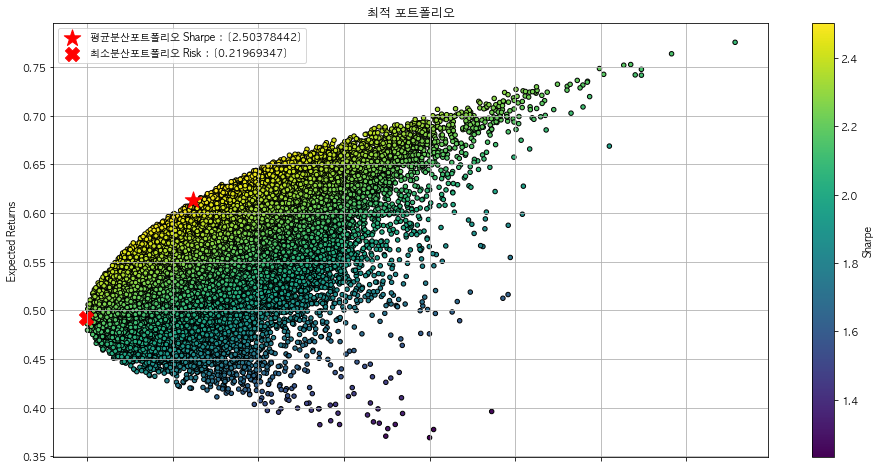

In [10]:
# Mean-Varinance portfolio(평균분산포트폴리오)
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
print(max_sharpe)

# Mininum-Variance portfolio(최소분산포트폴리오)
min_risk = df.loc[df['Risk'] == df['Risk'].min()]
print(min_risk)


# portfolio 시각화
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
                edgecolors='k', figsize=(16,8), grid=True)
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r',
            marker='*', s=300, label=f'평균분산포트폴리오 Sharpe : {max_sharpe["Sharpe"].values}')  
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
            marker='X', s=200, label=f'최소분산포트폴리오 Risk : {min_risk["Risk"].values}')  
plt.title('최적 포트폴리오')
plt.xlabel('Risk') 
plt.ylabel('Expected Returns')
plt.legend()
plt.show()